In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv(r'C:/Users/chat2/Downloads/ASS06_Data.csv')

In [4]:
df
df.iloc[:,0:7]
df.iloc[:,-1:]

,SalePrice
0,118000
1,127500
2,91500
3,124000
4,141000
...,...
1455,106000
1456,137000
1457,240000
1458,135000


In [5]:
f_k=[]
for i in range(0,20):
    f_i=[]
    x_test=df.iloc[:,0:6]
    y_test=df.iloc[:,-1:]
    reg = linear_model.LinearRegression()
    train=df.sample(n=1022)
    x_train=train.iloc[:,0:6]
    y_train=train.iloc[:,-1:]
    reg.fit(x_train,y_train)
    f_i.append(reg.predict(x_test))
    f_k.append(f_i)
f_k[19][0][1459]

array([209591.59681311])

In [6]:
r=map(sum, zip(*f_k))
    
for i in r:
    print(i)
    

[[3207777.08038792]
 [2363357.97389002]
 [2364184.52941986]
 ...
 [4273392.42688181]
 [2125850.28814692]
 [4054545.03840764]]


### Regression Bagging Estimator

In [7]:
f_bag=[]

for i in range(0,1460):
    sum_bag=0
    for j in range(0,20):
        sum_bag+=f_k[j][0][i]
    f_bag.append(sum_bag/20)


In [10]:
f_bag = pd.DataFrame(f_bag,columns =['Bagging Estimator']) 
f_bag

,Bagging Estimator
0,160388.854019
1,118167.898695
2,118209.226471
3,125452.028003
4,141609.513516
...,...
1455,172173.184444
1456,150333.284672
1457,213669.621344
1458,106292.514407


### Error estimator for Regression bagging estimator

In [8]:
f_error=[]
mse=[]

for i in range(0,1460):
    sum_error=0
    for j in range(0,20):
        sum_error+=(f_k[j][0][i]-f_bag[i][0])**2
        
    f_error.append(sum_error/120)
for i in range(0,len(f_error)):
    mse.append(f_error[i][0])
len(mse)

1460

In [9]:
mse = pd.DataFrame(mse,columns =['Error Estimator']) 
mse

,Error Estimator
0,1.450015e+07
1,1.659655e+06
2,5.754749e+05
3,2.650450e+06
4,3.161467e+06
...,...
1455,1.299710e+06
1456,3.880666e+06
1457,7.498830e+06
1458,4.147716e+05


### Box Plot for all 20 bagging predictions

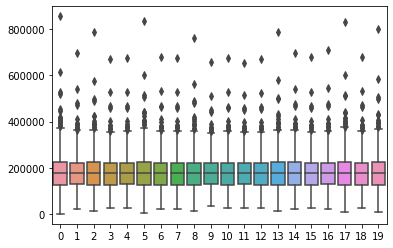

In [11]:
import seaborn as sns
x=[i for i in range(0,20)]
sns.boxplot(x=x, y=f_k)


## Problem 2

In [12]:
f_k_d=[]
for i in range(0,20):
    f_i_d=[]
    train=df.sample(n=1022,replace=True)
    x_test=df.iloc[:,0:6]
    y_test=df.iloc[:,-1:]
    x_train=train.iloc[:,0:6]
    y_train=train.iloc[:,-1:]
    clf = DecisionTreeRegressor()
    # Train Decision Tree Classifer
    clf = clf.fit(x_train,y_train)
    #Predict the response for test dataset
    f_i_d.append(clf.predict(x_test))
    f_k_d.append(f_i_d)


### Classification Bagging Estimator

In [16]:
f_tree_bag=[]

for i in range(0,1460):
    sum_bag=0
    for j in range(0,20):
        sum_bag+=f_k[j][0][i]
    f_tree_bag.append(sum_bag/20)


In [17]:
f_tree_bag = pd.DataFrame(f_tree_bag,columns =['Bagging Estimator']) 
f_tree_bag

,Bagging Estimator
0,160388.854019
1,118167.898695
2,118209.226471
3,125452.028003
4,141609.513516
...,...
1455,172173.184444
1456,150333.284672
1457,213669.621344
1458,106292.514407


### Error estimator for Classification bagging estimator

In [251]:
f_tree_error=[]
mse_tree=[]

for i in range(0,1460):
    sum_error=0
    for j in range(0,20):
        sum_error+=(f_k_d[j][0][i]-f_tree_bag[i][0])**2
        
    f_tree_error.append(sum_error/120)
# for i in range(0,len(f_tree_error)):
   # mse_tree.append(f_tree_error[i][0])
len(f_tree_error)

1460

In [252]:
mse_tree = pd.DataFrame(f_tree_error,columns =['Error Estimator']) 
mse_tree

,Error Estimator
0,2.252829e+08
1,7.055299e+07
2,1.215529e+08
3,6.592637e+06
4,5.015648e+07
...,...
1455,7.094656e+08
1456,3.347236e+07
1457,2.466159e+08
1458,1.433353e+08


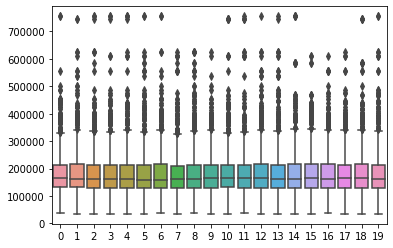

In [253]:
x=[i for i in range(0,20)]
sns.boxplot(x=x, y=f_k_d)